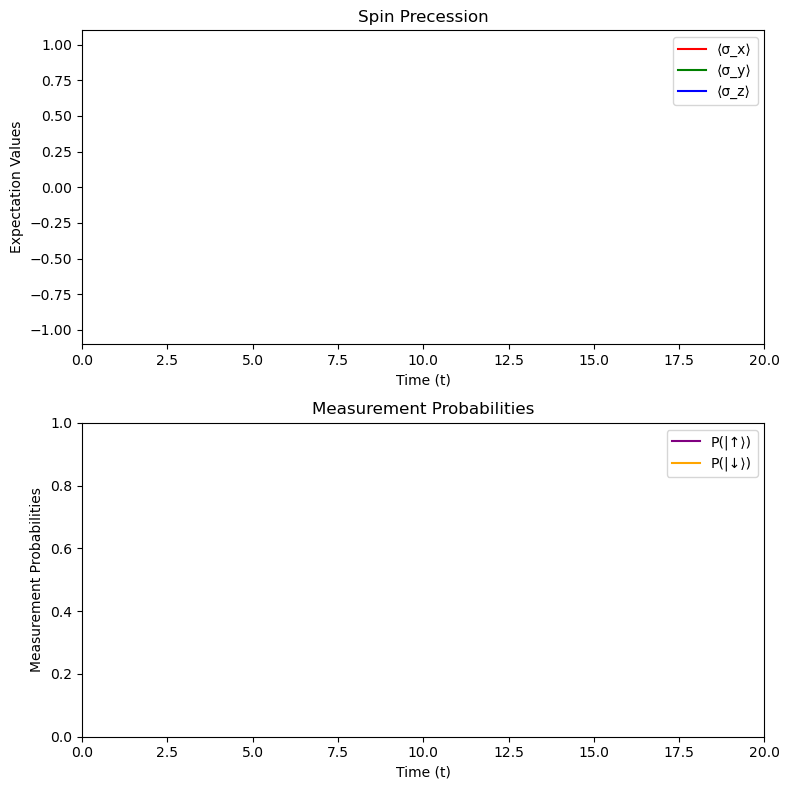

MovieWriter imagemagick unavailable; using Pillow instead.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
hbar = 1.0  # Reduced Planck's constant
B = np.array([0, 0, 1])  # Magnetic field in the z-direction
gamma = 1.0  # Gyromagnetic ratio

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Hamiltonian for spin in a magnetic field
H = -gamma * hbar * (B[0] * sigma_x + B[1] * sigma_y + B[2] * sigma_z)

# Initializing spin state (superposition of |↑⟩ and |↓⟩)
psi_0 = np.array([1, 1]) / np.sqrt(2)

# Time evolution operator
def time_evolution_operator(H, t):
    return np.exp(-1j * H * t / hbar)

# Expectation value of a Pauli matrix
def expectation_value(psi, sigma):
    return np.real(np.vdot(psi, sigma @ psi))

# Time evolution of the spin state
def evolve_spin_state(psi_0, H, t):
    U = time_evolution_operator(H, t)
    return U @ psi_0

# Initializing the figure
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Subplot 1: Spin expectation values
ax[0].set_xlim(0, 20)
ax[0].set_ylim(-1.1, 1.1)
ax[0].set_xlabel("Time (t)")
ax[0].set_ylabel("Expectation Values")
ax[0].set_title("Spin Precession")
line_x, = ax[0].plot([], [], label="⟨σ_x⟩", color="r")
line_y, = ax[0].plot([], [], label="⟨σ_y⟩", color="g")
line_z, = ax[0].plot([], [], label="⟨σ_z⟩", color="b")
ax[0].legend()

# Subplot 2: Probability of measurement in the z-basis
ax[1].set_xlim(0, 20)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Time (t)")
ax[1].set_ylabel("Measurement Probabilities")
ax[1].set_title("Measurement Probabilities")
line_up, = ax[1].plot([], [], label="P(|↑⟩)", color="purple")
line_down, = ax[1].plot([], [], label="P(|↓⟩)", color="orange")
ax[1].legend()

# Time array for animation
t_vals = np.linspace(0, 20, 200)

# Initializing data arrays for animation
x_vals = [0] * len(t_vals)  # Placeholder for ⟨σ_x⟩ values
y_vals = [0] * len(t_vals)  # Placeholder for ⟨σ_y⟩ values
z_vals = [0] * len(t_vals)  # Placeholder for ⟨σ_z⟩ values
p_up_vals = [0] * len(t_vals)  # Placeholder for P(|↑⟩)
p_down_vals = [0] * len(t_vals)  # Placeholder for P(|↓⟩)

# defining the function for animation
def update(frame):
    t = t_vals[frame]
    psi_t = evolve_spin_state(psi_0, H, t)
    
    # Calculating the expectation values
    x_vals[frame] = expectation_value(psi_t, sigma_x)
    y_vals[frame] = expectation_value(psi_t, sigma_y)
    z_vals[frame] = expectation_value(psi_t, sigma_z)
    
    # Calculate measurement probabilities in the z-basis
    p_up_vals[frame] = np.abs(np.vdot([1, 0], psi_t))**2
    p_down_vals[frame] = np.abs(np.vdot([0, 1], psi_t))**2
    
    # Update the lines
    line_x.set_data(t_vals[:frame+1], x_vals[:frame+1])
    line_y.set_data(t_vals[:frame+1], y_vals[:frame+1])
    line_z.set_data(t_vals[:frame+1], z_vals[:frame+1])
    line_up.set_data(t_vals[:frame+1], p_up_vals[:frame+1])
    line_down.set_data(t_vals[:frame+1], p_down_vals[:frame+1])
    
    return line_x, line_y, line_z, line_up, line_down

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(t_vals), interval=50, blit=True)

# Showing the animation
plt.tight_layout()
plt.show()

# Saving the animation as a GIF (optional)
ani.save('spin_precession.gif', writer='imagemagick')
